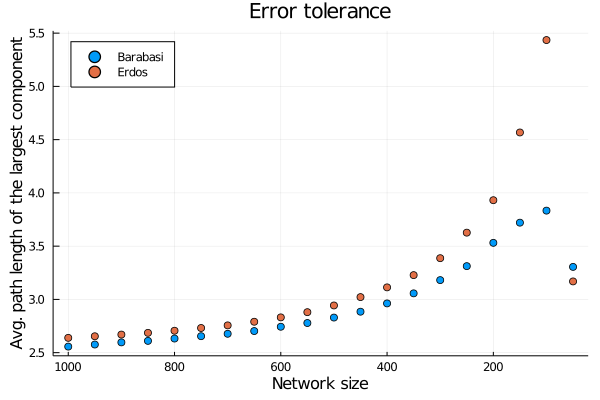

In [18]:
using Plots
using Random
using LightGraphs

function avg_path_length(g::SimpleGraph, nodes)
    path_lengths = Vector{UInt32}()
    for vertex in nodes
        dijkstra = dijkstra_shortest_paths(g, vertex)
        for d in dijkstra.dists
            if d == 0 || d >= typemax(Int32)
                continue
            end
            push!(path_lengths, d)
        end
    end
    node_count = size(nodes, 1)
    if node_count == 0
        return 0.0
    end
    return sum(path_lengths) / (node_count * (node_count - 1))
end

barabasi_graphs = [barabasi_albert(1000, 10) for i in 1:10]
erdos_graphs = [erdos_renyi(1000, 10000) for i in 1:10]

avg_barabasi = Vector{Float32}()
avg_erdos = Vector{Float32}()

for i=1000:-50:50
    avg_path = 0.0
    for g in barabasi_graphs
        components = connected_components(g)
        max_component_index = argmax([size(c, 1) for c in components])
        avg_path += avg_path_length(g, components[max_component_index]) / 10.0
    end
    push!(avg_barabasi, avg_path)
    avg_path = 0.0
    for g in erdos_graphs
        components = connected_components(g)
        max_component_index = argmax([size(c, 1) for c in components])
        avg_path += avg_path_length(g, components[max_component_index]) / 10.0
    end
    push!(avg_erdos, avg_path)

    for i=1:50
        for g in barabasi_graphs 
            vertex_count = size(vertices(g), 1)
            rem_vertex!(g, rand(1:vertex_count))
        end
        for g in erdos_graphs
            vertex_count = size(vertices(g), 1)
            rem_vertex!(g, rand(1:vertex_count))
        end
    end
    IJulia.clear_output(true)
    scatter(1000:-50:i, avg_barabasi, label="Barabasi")
    title!("Error tolerance")
    xlabel!("Network size")
    ylabel!("Avg. path length of the largest component")
    scatter!(1000:-50:i, avg_erdos, xflip=true, label="Erdos", legend=:topleft) |> IJulia.display
end

In [ ]:
using Plots
using Random
using LightGraphs

function avg_path_length(g::SimpleGraph, nodes)
    path_lengths = Vector{UInt32}()
    for vertex in nodes
        dijkstra = dijkstra_shortest_paths(g, vertex)
        for d in dijkstra.dists
            if d == 0 || d >= typemax(Int32)
                continue
            end
            push!(path_lengths, d)
        end
    end
    node_count = size(nodes, 1)
    if node_count == 0
        return 0.0
    end
    return sum(path_lengths) / (node_count * (node_count - 1))
end

barabasi_graphs = [barabasi_albert(1000, 10) for i in 1:10]
erdos_graphs = [erdos_renyi(1000, 10000) for i in 1:10]

avg_barabasi = Vector{Float32}()
avg_erdos = Vector{Float32}()

for i=1000:-50:50
    avg_path = 0.0
    for g in barabasi_graphs
        components = connected_components(g)
        max_component_index = argmax([size(c, 1) for c in components])
        avg_path += avg_path_length(g, components[max_component_index]) / 10.0
    end
    push!(avg_barabasi, avg_path)
    avg_path = 0.0
    for g in erdos_graphs
        components = connected_components(g)
        max_component_index = argmax([size(c, 1) for c in components])
        avg_path += avg_path_length(g, components[max_component_index]) / 10.0
    end
    push!(avg_erdos, avg_path)

    for i=1:50
        for g in barabasi_graphs
            rem_vertex!(g, argmax([size(outneighbors(g, v), 1) for v in vertices(g)]))
        end
        for g in erdos_graphs
            rem_vertex!(g, argmax([size(outneighbors(g, v), 1) for v in vertices(g)]))
        end
    end
    IJulia.clear_output(true)
    scatter(1000:-50:i, avg_barabasi, label="Barabasi")
    title!("Attack tolerance")
    xlabel!("Network size")
    ylabel!("Avg. path length of the largest component")
    scatter!(1000:-50:i, avg_erdos, xflip=true, label="Erdos", legend=:topleft) |> IJulia.display
end